In [1090]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

<p style="font-size:18px;text-align:center;">Constants</p>

In [1091]:
H_BAR = 197.3269804 #In units of MeV*fm
M_PI = (2*139.57039 + 134.9768)/3 #In units of MeV
DELTA_M = 293.1 #In units of MeV

<p style="font-size:18px;text-align:center;">Potential Functions</p>

In [1092]:
def x(r):
    return M_PI*r/H_BAR

In [1093]:
def y(r):
    return DELTA_M*r/H_BAR

In [1094]:
def vf1(mu, r):
    return mu**2*vf2(mu, r)

In [1095]:
def vf2(mu, r):
    return mu**2/np.sqrt(mu**2 + 4*x(r)**2)*np.exp(-np.sqrt(mu**2 + 4*x(r)**2))

In [1096]:
def vf3(mu, r):
    return np.sqrt(mu**2 + 4*x(r)**2)*vf2(mu, r)

In [1097]:
def vf4(mu, r):
    return (2*x(r)**2 + mu**2 + 2*y(r)**2)**2/(mu**2 + 4*y(r)**2)*vf2(mu, r)

In [1098]:
def vf5(mu, r):
    return mu/np.sqrt(mu**2 + 4*x(r)**2)*np.exp(-np.sqrt(mu**2 + 4*x(r)**2))*np.arctan(mu/(2*y(r)))

In [1099]:
def vf6(mu, r):
    return mu**2*vf5(mu, r)

In [1100]:
def vf7(mu, r):
    return mu**4*vf5(mu, r)

In [1101]:
def vf8(mu, r):
    return mu**2*np.sqrt(mu**2 + 4*x(r)**2)*vf5(mu, r)

In [1102]:
def vf9(mu, r):
    return np.sqrt(mu**2 + 4*x(r)**2)*vf5(mu, r)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

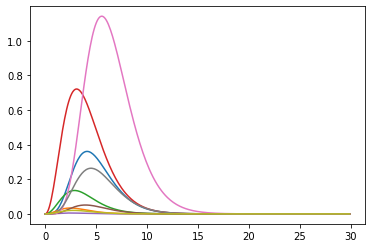

In [1103]:
mu = np.arange(0,30,0.1)
print(mu)
for f in [vf1, vf2, vf3, vf4, vf5, vf6, vf7, vf8, vf9]:
    plt.plot(mu, f(mu, 2.1))
plt.show()

<p style="font-size:18px;text-align:center;">Differences in Potential Integrals: Fortran vs. Python</p>

In [1104]:
data_chi_int = np.loadtxt('/home/hello/nn-scattering-fit/src/ chiral_integrals', unpack=True, skiprows=1)

# check that data is outputting in correct format: expect to see vf1_integral results
print(data_chi_int[1])

[5.97104607e+00 1.72901621e+00 2.25090133e-01 2.26759497e-02
 2.01266651e-03 1.65630144e-04 1.29619094e-05]


In [1105]:
vf1_integral_numpy = []

for r in np.arange(0.1,14.1,2):
    I_inf = quad(vf1, 0, np.inf, args=(r))

    vf1_integral_numpy.append((r, I_inf))


# to print object in vf1_integral_numpy array; should print (r, (vf1_integral_value, vf1_integral_uncertainty))
# for i in vf1_integral_numpy:
#     print(i)

# testing grabbing the first result without uncertainty
# print(vf1_integral_numpy[0][1][0])

In [1106]:
# for each term in vf_1 output from both sources (numpy integration and fortran calculation), find difference

vf1_integral_dif = []

# print(len(vf1_integral_numpy))

# print(range(len(vf1_integral_numpy))) # = [0 , 1, 2, 3, 4, 5, 6]

for i in range(len(vf1_integral_numpy)):
    vf1_integral_dif.append(  vf1_integral_numpy[i][1][0] - data_chi_int[1][i]   )

for i in vf1_integral_dif:
    print(i)


-6.332615232196304e-08
2.5158073402309356e-09
1.6695823890078287e-09
8.565882760047661e-10
3.5527017005348993e-10
1.1966580433812532e-10
3.3220522629296e-11


In [1107]:
vf2_integral_numpy = []

for r in np.arange(0.1,14.1,2):
    I_inf = quad(vf2, 0, np.inf, args=(r))

    vf2_integral_numpy.append((r, I_inf))

# for i in vf2_integral_numpy:
#     print(i)

In [1108]:
vf2_integral_dif = []

for i in range(len(vf2_integral_numpy)):
    vf2_integral_dif.append(  vf2_integral_numpy[i][1][0] - data_chi_int[2][i]   )

for i in vf2_integral_dif:
    print(i)

2.598981657442323e-06
3.8507197430703854e-11
-3.184267086120407e-12
8.412907957083826e-13
3.716712945441361e-13
1.2346493354867694e-13
-3.657302916906364e-14


In [1109]:
vf3_integral_numpy = []

for r in np.arange(0.1,14.1,2):
    I_inf = quad(vf3, 0, np.inf, args=(r))

    vf3_integral_numpy.append((r,I_inf))

# for i in vf3_integral_numpy:
#     print(i)

In [1110]:
vf3_integral_dif = []

for i in range(len(vf3_integral_numpy)):
    vf3_integral_dif.append(  vf3_integral_numpy[i][1][0] - data_chi_int[3][i]   )

for i in vf3_integral_dif:
    print(i)

1.5557871879678942e-08
7.193567963525993e-11
2.095396911538927e-10
2.8196091295118464e-11
1.2127494863380106e-11
4.215338337719074e-12
1.2111972335794433e-12


In [1111]:
vf4_integral_numpy = []

for r in np.arange(0.1,14.1,2):
    I_inf = quad(vf4, 0, np.inf, args=(r))

    vf4_integral_numpy.append((r,I_inf))

# for i in vf4_integral_numpy:
#     print(i)

In [1112]:
vf4_integral_dif = []

for i in range(len(vf4_integral_numpy)):
    vf4_integral_dif.append(  vf4_integral_numpy[i][1][0] - data_chi_int[4][i]   )

for i in vf4_integral_dif:
    print(i)

3.724058483811632e-08
2.302163348844033e-09
1.6819625692221507e-09
8.89327084196978e-10
4.1883889759231074e-10
1.527674239280158e-10
4.676180005280112e-11


In [1113]:
vf5_integral_numpy = []

for r in np.arange(0.1,14.1,2):
    I_inf = quad(vf5, 0, np.inf, args=(r))

    vf5_integral_numpy.append((r,I_inf))

# for i in vf5_integral_numpy:
#     print(i)

In [1114]:
vf5_integral_dif = []

for i in range(len(vf5_integral_numpy)):
    vf5_integral_dif.append(  vf5_integral_numpy[i][1][0] - data_chi_int[5][i]   )

for i in vf5_integral_dif:
    print(i)

9.830155647594374e-06
4.276037857131598e-12
4.185692591140988e-14
1.906532657441895e-13
1.0330749673277033e-14
1.3565176931391558e-15
-1.8708974987860623e-11


In [1115]:
vf6_integral_numpy = []

for r in np.arange(0.1,14.1,2):
    I_inf = quad(vf6, 0, np.inf, args=(r))

    vf6_integral_numpy.append((r,I_inf))

# for i in vf6_integral_numpy:
#     print(i)

In [1116]:
vf6_integral_dif = []

for i in range(len(vf6_integral_numpy)):
    vf6_integral_dif.append(  vf6_integral_numpy[i][1][0] - data_chi_int[6][i]   )

for i in vf6_integral_dif:
    print(i)

-2.5608615850103433e-07
1.1379180930859434e-10
6.364659146940177e-11
2.8854162548858087e-11
1.042079934170971e-11
-2.683740815536751e-12
7.604425514255725e-13


In [1117]:
vf7_integral_numpy = []

for r in np.arange(0.1,14.1,2):
    I_inf = quad(vf7, 0, np.inf, args=(r))

    vf7_integral_numpy.append((r,I_inf))

# for i in vf7_integral_numpy:
#     print(i)

In [1118]:
vf7_integral_dif = []

for i in range(len(vf7_integral_numpy)):
    vf7_integral_dif.append(  vf7_integral_numpy[i][1][0] - data_chi_int[7][i]   )

for i in vf7_integral_dif:
    print(i)

1.4477406296009576e-07
1.034606542660299e-07
6.061047952421461e-08
2.7760139645338633e-08
1.0130543350375665e-08
3.010467109973436e-09
7.444311508715746e-10


In [1119]:
vf8_integral_numpy = []

for r in np.arange(0.1,14.1,2):
    I_inf = quad(vf8, 0, np.inf, args=(r))

    vf8_integral_numpy.append((r,I_inf))

# for i in vf8_integral_numpy:
#     print(i)

In [1120]:
vf8_integral_dif = []

for i in range(len(vf8_integral_numpy)):
    vf8_integral_dif.append(  vf8_integral_numpy[i][1][0] - data_chi_int[8][i]   )

for i in vf8_integral_dif:
    print(i)

4.6339820869434334e-10
3.836795103850932e-09
1.992805281902932e-09
9.238589858406865e-10
3.457103841478931e-10
1.0576273296275356e-10
2.7039055499650147e-11


In [1121]:
vf9_integral_numpy = []

for r in np.arange(0.1,14.1,2):
    I_inf = quad(vf9, 0, np.inf, args=(r))

    vf9_integral_numpy.append((r,I_inf))

# for i in vf9_integral_numpy:
#     print(i)

In [1122]:
vf9_integral_dif = []

for i in range(len(vf9_integral_numpy)):
    vf9_integral_dif.append(  vf9_integral_numpy[i][1][0] - data_chi_int[9][i]   )

for i in vf9_integral_dif:
    print(i)

7.301956284067046e-08
5.276890036043369e-13
2.1719561912880714e-12
9.75989417322659e-13
3.608148901998367e-13
1.0925871104490524e-13
-1.95202677824538e-14


<p style="font-size:18px;text-align:center;">Differences in Potential Functions: Fortran vs. Python</p>

In [1123]:
data_r001 = np.loadtxt('../chiral_integrands_r_001.dat', unpack=True, skiprows=1)

In [1124]:
print(data_r001[0])

[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8
  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2
  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.
  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8
  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2
 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6
 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.
 14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4
 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8
 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2
 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6
 19.7 19

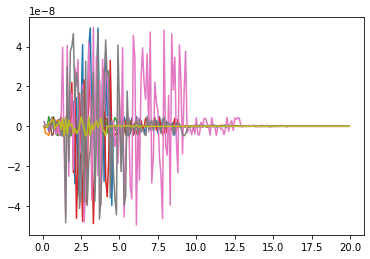

In [1125]:
plt.plot(data_r001[0], vf1(data_r001[0],0.1)-data_r001[1])
plt.plot(data_r001[0], vf2(data_r001[0],0.1)-data_r001[2])
plt.plot(data_r001[0], vf3(data_r001[0],0.1)-data_r001[3])
plt.plot(data_r001[0], vf4(data_r001[0],0.1)-data_r001[4])
plt.plot(data_r001[0], vf5(data_r001[0],0.1)-data_r001[5])
plt.plot(data_r001[0], vf6(data_r001[0],0.1)-data_r001[6])
plt.plot(data_r001[0], vf7(data_r001[0],0.1)-data_r001[7])
plt.plot(data_r001[0], vf8(data_r001[0],0.1)-data_r001[8])
plt.plot(data_r001[0], vf9(data_r001[0],0.1)-data_r001[9])

plt.show()

In [1126]:
data_r021 = np.loadtxt('../chiral_integrands_r_021.dat', unpack=True, skiprows=1)

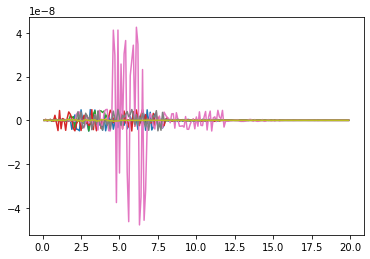

In [1127]:
plt.plot(data_r021[0], vf1(data_r021[0],2.1)-data_r021[1])
plt.plot(data_r021[0], vf2(data_r021[0],2.1)-data_r021[2])
plt.plot(data_r021[0], vf3(data_r021[0],2.1)-data_r021[3])
plt.plot(data_r021[0], vf4(data_r021[0],2.1)-data_r021[4])
plt.plot(data_r021[0], vf5(data_r021[0],2.1)-data_r021[5])
plt.plot(data_r021[0], vf6(data_r021[0],2.1)-data_r021[6])
plt.plot(data_r021[0], vf7(data_r021[0],2.1)-data_r021[7])
plt.plot(data_r021[0], vf8(data_r021[0],2.1)-data_r021[8])
plt.plot(data_r021[0], vf9(data_r021[0],2.1)-data_r021[9])

plt.show()

In [1128]:
data_r041 = np.loadtxt('../chiral_integrands_r_041.dat', unpack=True, skiprows=1)

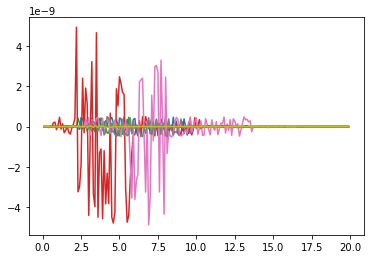

In [1129]:
plt.plot(data_r041[0], vf1(data_r041[0],4.1)-data_r041[1])
plt.plot(data_r041[0], vf2(data_r041[0],4.1)-data_r041[2])
plt.plot(data_r041[0], vf3(data_r041[0],4.1)-data_r041[3])
plt.plot(data_r041[0], vf4(data_r041[0],4.1)-data_r041[4])
plt.plot(data_r041[0], vf5(data_r041[0],4.1)-data_r041[5])
plt.plot(data_r041[0], vf6(data_r041[0],4.1)-data_r041[6])
plt.plot(data_r041[0], vf7(data_r041[0],4.1)-data_r041[7])
plt.plot(data_r041[0], vf8(data_r041[0],4.1)-data_r041[8])
plt.plot(data_r041[0], vf9(data_r041[0],4.1)-data_r041[9])

plt.show()

In [1130]:
data_r061 = np.loadtxt('../chiral_integrands_r_061.dat', unpack=True, skiprows=1)

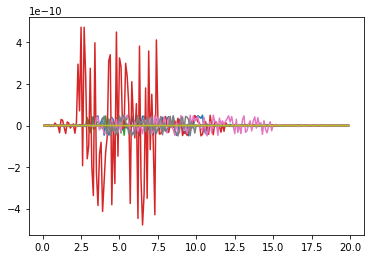

In [1131]:
plt.plot(data_r061[0], vf1(data_r061[0],6.1)-data_r061[1])
plt.plot(data_r061[0], vf2(data_r061[0],6.1)-data_r061[2])
plt.plot(data_r061[0], vf3(data_r061[0],6.1)-data_r061[3])
plt.plot(data_r061[0], vf4(data_r061[0],6.1)-data_r061[4])
plt.plot(data_r061[0], vf5(data_r061[0],6.1)-data_r061[5])
plt.plot(data_r061[0], vf6(data_r061[0],6.1)-data_r061[6])
plt.plot(data_r061[0], vf7(data_r061[0],6.1)-data_r061[7])
plt.plot(data_r061[0], vf8(data_r061[0],6.1)-data_r061[8])
plt.plot(data_r061[0], vf9(data_r061[0],6.1)-data_r061[9])

plt.show()

In [1132]:
data_r081 = np.loadtxt('../chiral_integrands_r_081.dat', unpack=True, skiprows=1)

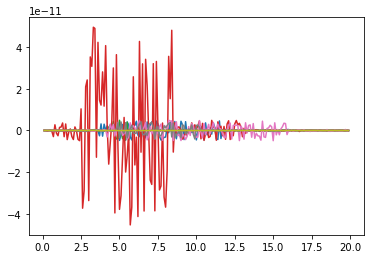

In [1133]:
plt.plot(data_r081[0], vf1(data_r081[0],8.1)-data_r081[1])
plt.plot(data_r081[0], vf2(data_r081[0],8.1)-data_r081[2])
plt.plot(data_r081[0], vf3(data_r081[0],8.1)-data_r081[3])
plt.plot(data_r081[0], vf4(data_r081[0],8.1)-data_r081[4])
plt.plot(data_r081[0], vf5(data_r081[0],8.1)-data_r081[5])
plt.plot(data_r081[0], vf6(data_r081[0],8.1)-data_r081[6])
plt.plot(data_r081[0], vf7(data_r081[0],8.1)-data_r081[7])
plt.plot(data_r081[0], vf8(data_r081[0],8.1)-data_r081[8])
plt.plot(data_r081[0], vf9(data_r081[0],8.1)-data_r081[9])

plt.show()

In [1134]:
data_r101 = np.loadtxt('../chiral_integrands_r_101.dat', unpack=True, skiprows=1)

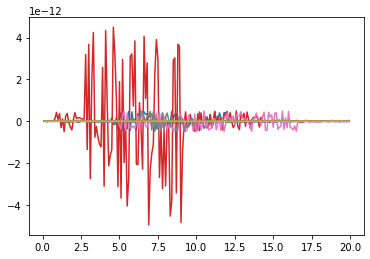

In [1135]:
plt.plot(data_r101[0], vf1(data_r101[0],10.1)-data_r101[1])
plt.plot(data_r101[0], vf2(data_r101[0],10.1)-data_r101[2])
plt.plot(data_r101[0], vf3(data_r101[0],10.1)-data_r101[3])
plt.plot(data_r101[0], vf4(data_r101[0],10.1)-data_r101[4])
plt.plot(data_r101[0], vf5(data_r101[0],10.1)-data_r101[5])
plt.plot(data_r101[0], vf6(data_r101[0],10.1)-data_r101[6])
plt.plot(data_r101[0], vf7(data_r101[0],10.1)-data_r101[7])
plt.plot(data_r101[0], vf8(data_r101[0],10.1)-data_r101[8])
plt.plot(data_r101[0], vf9(data_r101[0],10.1)-data_r101[9])

plt.show()

In [1136]:
data_r121 = np.loadtxt('../chiral_integrands_r_121.dat', unpack=True, skiprows=1)

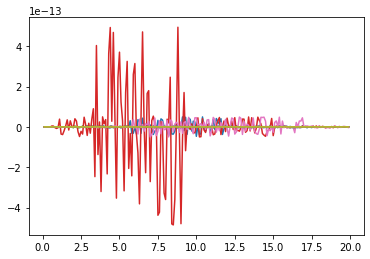

In [1137]:
plt.plot(data_r121[0], vf1(data_r121[0],12.1)-data_r121[1])
plt.plot(data_r121[0], vf2(data_r121[0],12.1)-data_r121[2])
plt.plot(data_r121[0], vf3(data_r121[0],12.1)-data_r121[3])
plt.plot(data_r121[0], vf4(data_r121[0],12.1)-data_r121[4])
plt.plot(data_r121[0], vf5(data_r121[0],12.1)-data_r121[5])
plt.plot(data_r121[0], vf6(data_r121[0],12.1)-data_r121[6])
plt.plot(data_r121[0], vf7(data_r121[0],12.1)-data_r121[7])
plt.plot(data_r121[0], vf8(data_r121[0],12.1)-data_r121[8])
plt.plot(data_r121[0], vf9(data_r121[0],12.1)-data_r121[9])

plt.show()